In [1]:
import numpy as np
import numpy.linalg as lg
import scipy as sc
import math as math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab as P
%matplotlib inline

Question 1

In [2]:
A = np.array([[1., 1., 1., 1., 1.], 
              [1., 1., 1., 1., 0.5], 
              [1., 1., 1., 0.5, 0.0],
              [1., 1., 0.5, 0.0, 0.0],
              [1., 0.5, 0.0, 0.0, 0.0],
              [0.5, 0.0, 0.0, 0.0, 0.0]])

mt = np.array([1, 2, 3, 4, 5])

dt = np.array([15., 12.5, 8., 4.5, 2., 0.5])

sig = [0.3, 0.2, 0.1, 0.1, 0.05, 0.05]

Cd = np.zeros((6,6))
for i in range(0, len(sig), 1):
    Cd[i][i] = sig[i]**2

In [3]:
def invertML(d, Cd, A):
    At = np.transpose(A)
    Cdi = lg.inv(Cd)
    X = np.dot(At, Cdi)
    X = np.dot(X, A)
    X = lg.inv(X)
    B = np.dot(At, Cdi)
    X = np.dot(X, B)
    m = np.dot(X, d)
    return m

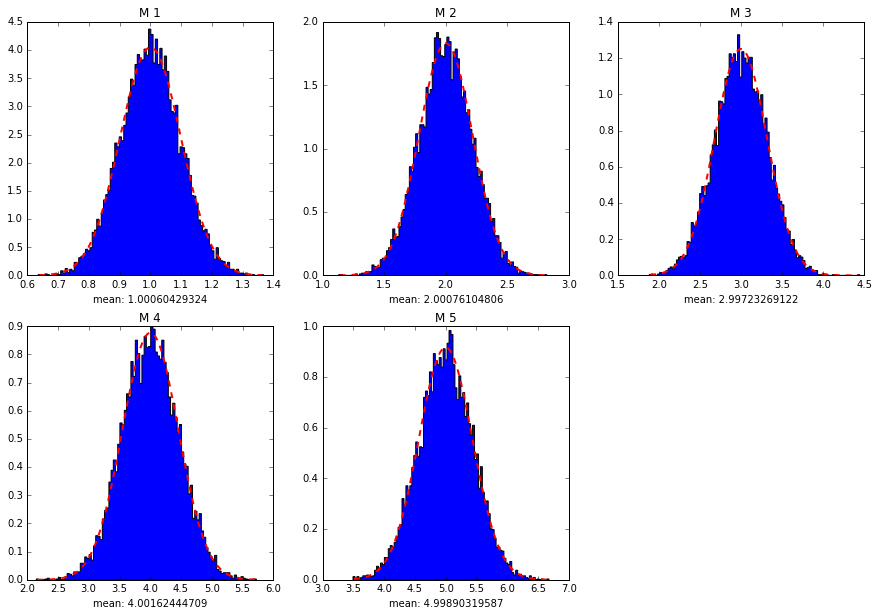

In [4]:
def mcML(dt, Cd, A, num):
    plots = A.shape[1]
    m = np.zeros((plots, num))
    d = dt*0.
    for i in range(0, num, 1):
        for j in range(0, len(dt), 1):
            d[j] = dt[j] + np.random.normal(0,np.sqrt(Cd[j][j]))
            #print np.random.normal(0,np.sqrt(Cd[j][j]))
        mi = invertML(d.T, Cd, A)
        for j in range(0, plots, 1):
            m[j][i] = mi[j]
    Cm = lg.inv(np.dot(np.dot(A.T,lg.inv(Cd)),A))
    plt.figure(figsize=(15,10))
    
    for j in range(0, plots, 1):
        ax = plt.subplot(math.ceil(math.sqrt(plots))-1,math.ceil(math.sqrt(plots)),j+1)
        n, bins, patches = ax.hist(m[j], 100, normed=1, histtype='stepfilled')
        bincenters = 0.5*(bins[1:]+bins[:-1])
        ax = plt.xlabel('mean: ' + str(np.mean(m[j])))
        ax = plt.title('M ' + str(j+1))
        y = mlab.normpdf(bincenters, np.mean(m[j]), np.sqrt(Cm[j][j]))
        ax = plt.plot(bincenters, y, 'r--', linewidth=2)

mcML(dt, Cd, A, 10000)
plt.savefig('A2Q1a.pdf')

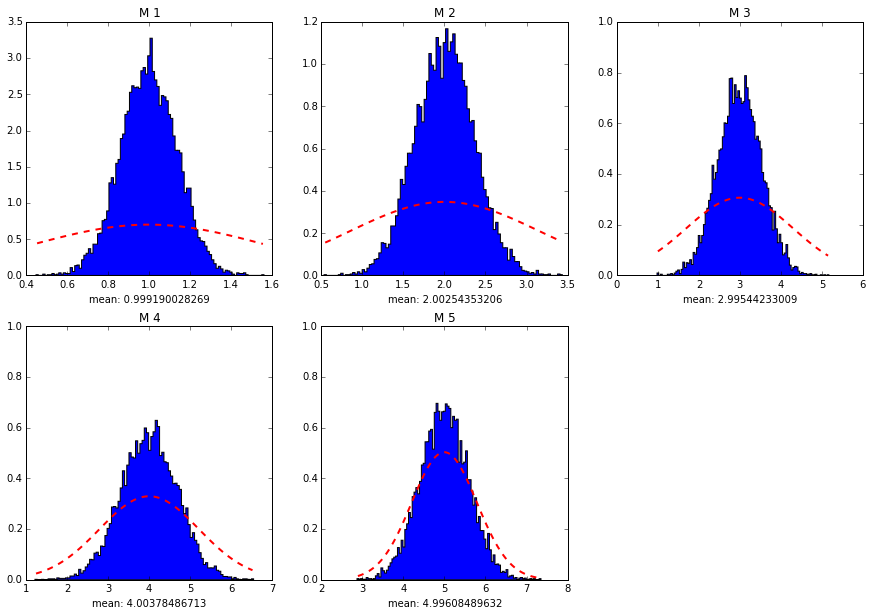

In [12]:
Cdu = np.zeros((6,6))
for i in range(0,6,):
    Cdu[i][i] = 0.1

def mcML1(dt, Cd, A, num):
    plots = A.shape[1]
    m = np.zeros((plots, num))
    d = dt*0.
    for i in range(0, num, 1):
        for j in range(0, len(dt), 1):
            d[j] = dt[j] + np.random.normal(0,np.sqrt(Cd[j][j]))
        mi = invertML(d.T, Cdu, A)
        for j in range(0, plots, 1):
            m[j][i] = mi[j]
    Cm = lg.inv(np.dot(np.dot(A.T,lg.inv(Cdu)),A))
    plt.figure(figsize=(15,10))

    for j in range(0, plots, 1):
        ax = plt.subplot(math.ceil(math.sqrt(plots))-1,math.ceil(math.sqrt(plots)),j+1)
        n, bins, patches = ax.hist(m[j], 100, normed=1, histtype='stepfilled')
        bincenters = 0.5*(bins[1:]+bins[:-1])
        ax = plt.xlabel('mean: ' + str(np.mean(m[j])))
        ax = plt.title('M ' + str(j+1))
        y = mlab.normpdf(bincenters, np.mean(m[j]), np.sqrt(Cm[j][j]))
        ax = plt.plot(bincenters, y, 'r--', linewidth=2)
        if(j>1): plt.ylim(0,1)

mcML1(dt, Cd, A, 10000)
plt.savefig('A2Q1b.pdf')

The mean solution for the model comes out pretty well the same, independant of the weighting. The assumed errors are larger than the actual varience in the data, especially for the first few model parameters, therefore the theoretical curves are wider.

Question 2

Smallest solution: 

In [6]:
A2 = np.array([[1,1,1],[1,1,0]])
d2 = np.transpose(np.array([6,3]))
Cd2 = np.array([[0.3, 0.0],
               [0.0, 0.2]])

smallest solution
M1: 1.5
M2: 1.5
M3: 3.0


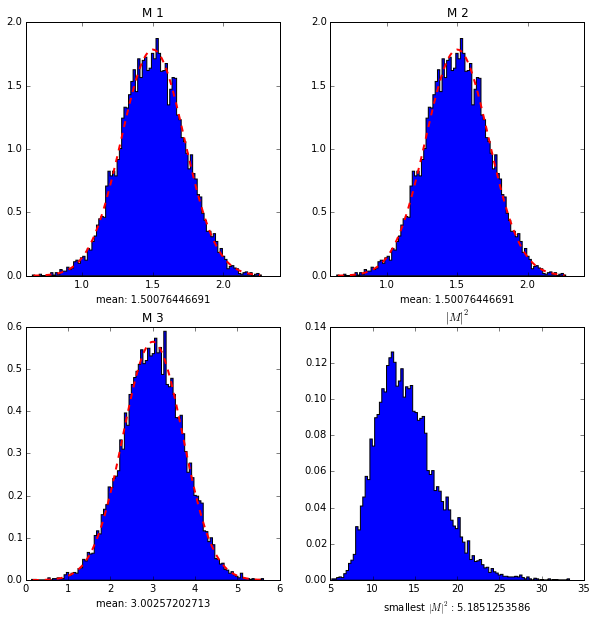

In [14]:
def NormalSol(d, A):
    At = np.transpose(A)
    X = np.dot(A, At)
    X = lg.inv(X)
    X = np.dot(At,X)
    m = np.dot(X, d)
    return m

def mcNS(dt, Cd, A, num):
    plots = A.shape[1]
    m = np.zeros((plots, num))
    mnorm = np.zeros(num)
    d = dt*0.
    for i in range(0, num, 1):
        #need to add guassian noise with standard deviations shown above.
        for j in range(0, len(dt),1):
            d[j]= dt[j] + np.random.normal(0,np.sqrt(Cd[j][j]))
        mi = NormalSol(d.T, A)
        mnorm[i] = np.dot(mi, np.transpose(mi))
        for j in range(0, plots, 1):
            m[j][i] = mi[j]
    B = lg.inv(np.dot(A,A.T))
    Cm = np.dot(np.dot(np.dot(A.T, B), np.dot(Cd, B)),A)
    
    plt.figure(figsize=(10,10))
    for j in range(0, plots, 1):
        ax = plt.subplot(math.ceil(math.sqrt(plots)),math.ceil(math.sqrt(plots)),j+1)
        n, bins, patches = ax.hist(m[j], 100, normed=1, histtype='stepfilled')
        bincenters = 0.5*(bins[1:]+bins[:-1])
        ax = plt.xlabel('mean: ' + str(np.mean(m[j])))
        ax = plt.title('M ' + str(j+1))
        y = mlab.normpdf(bincenters, np.mean(m[j]), np.sqrt(Cm[j][j]))
        ax = plt.plot(bincenters, y, 'r--', linewidth=2)
    
    ax = plt.subplot(math.ceil(math.sqrt(plots,)), math.ceil(math.sqrt(plots)), plots+1)
    n, bins, patches = ax.hist(mnorm, 100, normed=1, histtype='stepfilled')
    ax = plt.title('$|M|^2$')
    ax = plt.xlabel('smallest $|M|^2$: '+ str(np.min(mnorm)))
    
m = NormalSol(d2, A2)
print 'smallest solution'
print 'M1: ' + str(m[0])
print 'M2: ' + str(m[1])
print 'M3: ' + str(m[2])
mcNS(d2, Cd2, A2, 10000)

plt.savefig('smallest.pdf')

In [8]:
m1 = np.array([2, 1, 3])
m2 = np.array([5, -2, 3])
m3 = np.array([1, 2, 3])
m4 = np.array([900, -897, 3])
m5 = np.array([1.5, 1.5, 3])

print np.dot(m1, m1.T)
print np.dot(m2, m2.T)
print np.dot(m3, m3.T)
print np.dot(m4, m4.T)
print np.dot(m5, m5.T)

14
38
14
1614618
13.5


By inspection, 3 solutions are: <br/>
m = (2, 1, 3),  $m^T m$ = 14 <br/>
m = (5, -2, 3),      $m^T m$ = 38 <br/>
m = (900, - 897, 3), $m^T m$ = 1614618 <br/>

Smallest Solution: <br/>
m = (1.5, 1.5, 3),  $m^T m$ = 13.5

Actual Solution: <br/>
m = (1, 2, 3) $m^T m$ = 14